# Phase 1 - Week 3 - Day 1 PM - Dimensionality Reduction

# A. Usecase 1 : Image Compression

In the first tutorial, we will implement dimensionality reduction to perform image compression. The dataset that will be used is the MNIST dataset.

* MNIST is a dataset that contains 70,000 images of handwritten digits.
* The classes/labels are numbers between **0 and 9**.
* Each of image is contains **28 * 28 pixels**.
* Each of image is **black-and-white** image where each pixel contains number between 0-255.
* Sample of dataset : [MNIST sample](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png).
* For more details, please visit : [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database) or [Yann Le Cun's Website](/http://yann.lecun.com/exdb/mnist/).

In [122]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [123]:
# Download and Splitting Dataset
%%time
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (52500, 784)
Test Size  :  (17500, 784)
CPU times: user 5.98 s, sys: 726 ms, total: 6.71 s
Wall time: 7 s


In [124]:
# Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
# Train with PCA
%%time
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

CPU times: user 2.81 s, sys: 8.14 ms, total: 2.82 s
Wall time: 1.54 s


PCA()

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

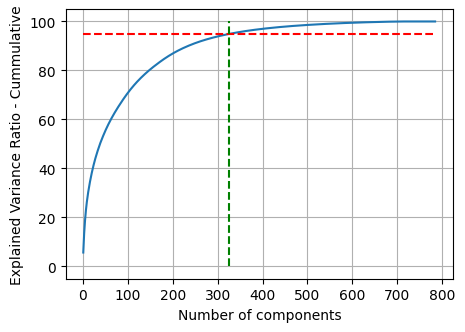

In [126]:
# Plot the Cummulative of Explained Variance Ratio

plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 785), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.hlines(95, 1, 785, colors ='red', linestyles='dashed')
plt.vlines(325, 0, 100, colors ='green', linestyles='dashed')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

Text(0, 0.5, 'Eigenvalues')

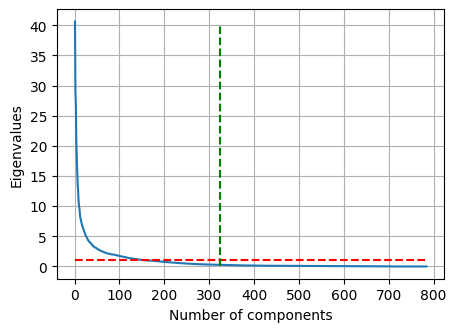

In [127]:
# Plot the Eigenvalues

plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 785), pca.explained_variance_ )
plt.hlines(1, 0, 785, colors ='red', linestyles='dashed')
plt.vlines(325, 0, 40, colors ='green', linestyles='dashed')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [128]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

np.int64(328)

In [129]:
# Check the number of features if we want to retain eigenvalue min. 1

condition = pca.explained_variance_ >= 1
num_features = condition.sum()
num_features

np.int64(162)

In [130]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(X_train_scaled)

X_test_reduced = pca.transform(X_test_scaled)
X_test_recovered = pca.inverse_transform(X_test_reduced)
X_test_recovered = scaler.inverse_transform(X_test_recovered)

In [131]:
# Function to Visualize A Group of Images

def plot_digits(instances, images_per_row=10):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap='gray')
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

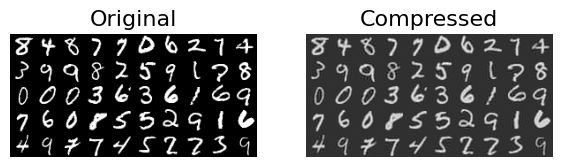

In [132]:
# Visualization of the First 50 Images

plt.figure(figsize=(7, 4))

plt.subplot(121)
plot_digits(X_test[:50])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_test_recovered[:50])
plt.title("Compressed", fontsize=16)

It can be seen that even though we only use 326 features from 784, the resulting image after dimension reduction is not much different from the original image.

# B. Usecase 2 : Classification

For the second case, dimensionality reduction techniques will be used in the classification case for the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

In [133]:
# Data Loading
from sklearn.datasets import load_wine

wine_data = load_wine()
wine_df = pd.DataFrame(wine_data['data'], columns=wine_data.feature_names)
wine_df['target'] = wine_data.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [134]:
# Split between Features and Target
X = wine_df.drop("target", axis=1)
y = wine_df['target']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (151,)
Test Size  :  (27,)


In [135]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [136]:
# Model Training using Logistic Regression - Without PCA

from sklearn.linear_model import LogisticRegression

logreg_1 = LogisticRegression(C=1, random_state=10)
logreg_1.fit(X_train_scaled, y_train)

LogisticRegression(C=1, random_state=10)

In [137]:
# Check Variance with with PCA
%%time
pca = PCA()
pca.fit(X_train_scaled)

CPU times: user 2.19 ms, sys: 16 µs, total: 2.2 ms
Wall time: 1.21 ms


PCA()

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

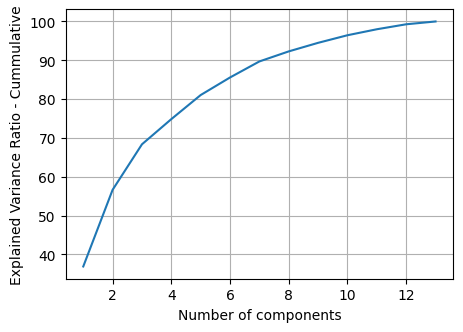

In [138]:
# Plot the Cummulative of Explained Variance Ratio

plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(range(1, 14), np.cumsum(pca.explained_variance_ratio_ * 100))
# plt.xticks((1, 12))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

Based on the visualization above, we can see that if we choose the number of components as 5, we can retain more than 80 % the information.

In [139]:
# Let's train the model with 5 components

pca = PCA(n_components=5, random_state=10)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

logreg_2 = LogisticRegression(C=1, random_state=10)
logreg_2.fit(X_train_scaled_pca, y_train)

print('Number of components : ', pca.n_components_)

Number of components :  5


In [140]:
# Check the performance

y_pred_test = logreg_1.predict(X_test_scaled)
y_pred_test_pca = logreg_2.predict(X_test_scaled_pca)

print('Without PCA : \n', classification_report(y_test, y_pred_test))
print('With PCA : \n', classification_report(y_test, y_pred_test_pca))

Without PCA : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5

    accuracy                           0.96        27
   macro avg       0.94      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

With PCA : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5

    accuracy                           0.96        27
   macro avg       0.94      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27



We can see that by reducing the number of features from 13 to 5, the performance of the model is still the same. This means that the dimension reduction process with PCA was successful in this case.